# News Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn import metrics
import itertools
%matplotlib inline

In [2]:
data=pd.read_csv('news.csv')

In [3]:
data["CATEGORY"].value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [4]:
names=['Entertainment', 'Business', 'Science and Technology', 'Health']

array([<AxesSubplot:ylabel='CATEGORY'>], dtype=object)

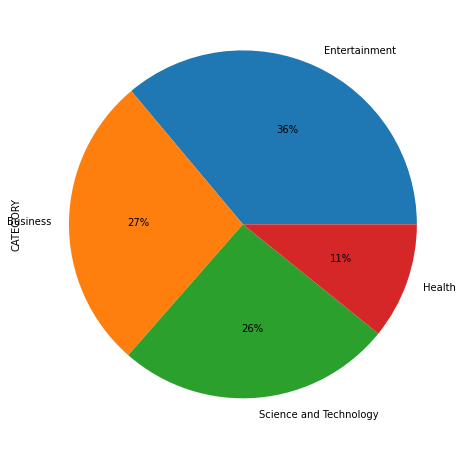

In [5]:
data["CATEGORY"].value_counts().plot(kind='pie', labels=names, autopct='%1.0f%%', subplots=True, figsize=(8, 8))

In [6]:
X=data["TITLE"]
y=data["CATEGORY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
                         ])

In [8]:
text_clf = text_clf.fit(X_train, y_train)
predicted1 = text_clf.predict(X_test)

In [9]:
metrics.accuracy_score(y_test, predicted1)

0.9227309313006012

In [10]:
print(metrics.classification_report(y_test, predicted1, target_names=sorted(names)))

                        precision    recall  f1-score   support

              Business       0.89      0.91      0.90     34868
         Entertainment       0.95      0.97      0.96     45630
                Health       0.97      0.84      0.90     13658
Science and Technology       0.90      0.90      0.90     32570

              accuracy                           0.92    126726
             macro avg       0.93      0.91      0.92    126726
          weighted avg       0.92      0.92      0.92    126726

